In [68]:
from sklearn.neural_network import MLPRegressor
from sklearn import svm
import numpy as np

f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(16139):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append([int.from_bytes(left, byteorder = 'little' ,signed = True)])
  right_lst.append([int.from_bytes(right, byteorder = 'little' ,signed = True)])
  pan_lst.append([int.from_bytes(pan, byteorder = 'little' ,signed = True)])
  tilt_lst.append([int.from_bytes(tilt, byteorder = 'little' ,signed = True)])

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(16139):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append([int.from_bytes(panoff, byteorder = 'little' ,signed = True)])
  tiltoff_lst.append([int.from_bytes(tiltoff, byteorder = 'little' ,signed = True)])
  rotateoff_lst.append([int.from_bytes(rotateoff, byteorder = 'little' ,signed = True)])
  tranoff_lst.append([int.from_bytes(tranoff, byteorder = 'little' ,signed = True)])

rotatecom = []
translatecom = []
for i in range(16139):
  rotatecom.append([(right_lst[i][0] - left_lst[i][0])/2])
  translatecom.append([(right_lst[i][0] + left_lst[i][0])/2])


In [81]:
size = 15000
test_num = 1000
datanum = 5
purpose_offset = panoff_lst
purpose_value = pan_lst

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(purpose_offset)
purpose_offset = scaler1.transform(purpose_offset)
scaler2 = MinMaxScaler().fit(purpose_value)
purpose_value = scaler2.transform(purpose_value)

In [83]:
input_lst = []
for i in range(size - datanum + 1):
  box=[]
  for j in range(i, i+datanum, 1):
    box.append(purpose_offset[j][0])
  input_lst.append(box)


label_lst = []
for i in range(datanum - 1, size, 1):
  label_lst.append(purpose_value[i])


In [84]:
print(input_lst)

[[0.4664310954063604, 0.46289752650176674, 0.4840989399293286, 0.48763250883392223, 0.48763250883392223], [0.46289752650176674, 0.4840989399293286, 0.48763250883392223, 0.48763250883392223, 0.3286219081272085], [0.4840989399293286, 0.48763250883392223, 0.48763250883392223, 0.3286219081272085, 0.33922261484098937], [0.48763250883392223, 0.48763250883392223, 0.3286219081272085, 0.33922261484098937, 0.34275618374558303], [0.48763250883392223, 0.3286219081272085, 0.33922261484098937, 0.34275618374558303, 0.3568904593639576], [0.3286219081272085, 0.33922261484098937, 0.34275618374558303, 0.3568904593639576, 0.3780918727915194], [0.33922261484098937, 0.34275618374558303, 0.3568904593639576, 0.3780918727915194, 0.46289752650176674], [0.34275618374558303, 0.3568904593639576, 0.3780918727915194, 0.46289752650176674, 0.4840989399293286], [0.3568904593639576, 0.3780918727915194, 0.46289752650176674, 0.4840989399293286, 0.5159010600706714], [0.3780918727915194, 0.46289752650176674, 0.4840989399293

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    input_lst, label_lst, test_size = 0.25, random_state=42)

In [86]:
print(len(X_train))
print(len(X_test))

11247
3749


In [87]:

# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = svm.SVR()


In [88]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
clf.predict(X_test)


array([0.50544548, 0.42670257, 0.52939245, ..., 0.50713008, 0.51009454,
       0.59242042])

R_square : [0.08379837]


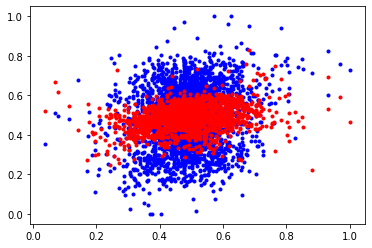

In [90]:
import matplotlib.pyplot as plt

y_hat = clf.predict(X_test)


SSE_lst = 0 
SST_lst = 0

sume = 0
for i in range(len(Y_test)):
  sume = sume + Y_test[i]

means = float(sume/len(Y_test))

for i in range(len(Y_test)):
  SSE_lst += (Y_test[i] - y_hat[i])**2
  SST_lst += (Y_test[i] - means)**2



R_square = 1 - (SSE_lst / SST_lst)

print("R_square :", R_square) 

input_encoded = []
for i in range(len(X_test)):
  input_encoded.append(X_test[i][datanum -1])

plt.plot(input_encoded, Y_test, '.', color = 'b') 
plt.plot(input_encoded, y_hat, '.', color = 'r') 

plt.show()

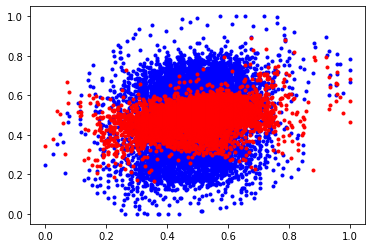

In [91]:
input_encoded = []
for i in range(len(input_lst)):
  input_encoded.append(input_lst[i][datanum -1])
y_hat_2 = clf.predict(input_lst)

plt.plot(input_encoded, label_lst, '.', color = 'b')
plt.plot(input_encoded, y_hat_2, '.', color = 'r')
plt.show()